# Ukraine Coffee Shops

## Project Motivation

The objective of this project is to get an understanding of the coffee market in Ukraine. The company wants to identify the main segments and their key features. This information will help in the company's expansion effort into new markets, in this case Ukraine.

In [1]:
# import system and exploratory analysis modules
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy as np; print("Numpy", np.__version__)
import matplotlib
import matplotlib.pyplot as plt; print("Matplotlib", matplotlib.__version__)
import pandas as pd; print("Pandas", pd.__version__)
import seaborn as sns; print("Seaborn", sns.__version__)
import scipy; print("Scipy", scipy.__version__)
import sklearn; print("Scikit -Learn", sklearn.__version__)

Windows-10-10.0.19041-SP0
Python 3.6.12 |Anaconda, Inc.| (default, Sep  9 2020, 00:29:25) [MSC v.1916 64 bit (AMD64)]
Numpy 1.19.2
Matplotlib 3.3.2
Pandas 1.1.5
Seaborn 0.11.1
Scipy 1.5.2
Scikit -Learn 0.23.2


In [2]:
# set theme for seaborn
sns.set_style('darkgrid')
sns.set(font_scale = 1)

## Read Data

The dataset available for this analysis was extracted from Google businesses. It contains data on Region, Place name, Place type, Rating, Reviews, Price, Delivery option, Dine in option and Takeout option.

In [3]:
# function to read data, check for nulls and drop duplicates
def read_data(data_path):
    # read data
    print("Reading Alcohol Consumption in Russia dataset\n")
    df = pd.read_csv(data_path)
    # make a copy of dataframe
    print("Making a copy of the dataframe\n")
    df_1 = df.copy()
    # drop duplicates
    df_final = df_1.drop_duplicates()
    # extract feature names
    df_cols = df_final.columns.tolist()
    print("Data consists of:\n")
    print("...........................\n")
    print("Rows: {}\n".format(len(df_final)))
    print("Columns: {}\n".format(len(df_cols)))
    print("...........................\n")
    # empty list to hold data types, non nulss count, nulss count, percentage of nulls in a column,\
    # percentage of column nulls in datafram
    data_types = []
    non_nulls = []
    nulls = []
    null_column_percent = []
    null_df_percent = []
    
    # loop through columns and capture the variables above
    print("Extracting count and percentages of nulls and non nulls")
    for col in df_cols:
        
        # extract null count
        null_count = df_final[col].isna().sum()
        nulls.append(null_count)
        
        # extract non null count
        non_null_count = len(df_final) - null_count
        non_nulls.append(non_null_count)
        
        # extract % of null in column
        col_null_perc = 100 * null_count/len(df_final)
        null_column_percent.append(col_null_perc)
        
        # extract % of nulls out of total nulls in dataframe
        df_null_perc = 100 * null_count/df_final.isna().sum().sum()
        null_df_percent.append(df_null_perc)
        
        # capture data types
        data_types.append(df_final[col].dtypes) 
        
    # create zipped list with column names, data_types, nulls and non nulls
    lst_data = list(zip(df_cols, data_types, non_nulls, nulls, null_column_percent, null_df_percent))
    # create dataframe of zipped list
    df_zipped = pd.DataFrame(lst_data, columns = ['Feature', 'DataType', 'CountOfNonNulls', 'CountOfNulls',\
                                                 'PercentOfNullsIinColumn', 'PercentOfNullsInData'])
    return df_final, df_cols, df_zipped

In [4]:
path = 'data/Ukraine Cities Coffee Shops Analysis - Main.csv'
df, features, df_QA = read_data(path)

Reading Alcohol Consumption in Russia dataset

Making a copy of the dataframe

Data consists of:

...........................

Rows: 200

Columns: 9

...........................

Extracting count and percentages of nulls and non nulls


In [5]:
# check nulls and data type
df_QA

,Feature,DataType,CountOfNonNulls,CountOfNulls,PercentOfNullsIinColumn,PercentOfNullsInData
0,Region,object,200,0,0.0,0.000000
1,Place name,object,200,0,0.0,0.000000
2,Place type,object,200,0,0.0,0.000000
3,Rating,float64,198,2,1.0,0.743494
4,Reviews,float64,198,2,1.0,0.743494
5,Price,object,122,78,39.0,28.996283
6,Delivery option,object,129,71,35.5,26.394052
7,Dine in option,object,140,60,30.0,22.304833
8,Takeout option,object,144,56,28.0,20.817844


In [6]:
# inspect first 5 rows of data
df.head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,Mariupol,Dim Kavu,Coffee store,4.6,206.0,NaN,NaN,NaN,NaN
1,Mariupol,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,Mariupol,Кофейня Світ Чаю,Coffee shop,5.0,11.0,NaN,NaN,NaN,True
3,Mariupol,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,Mariupol,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,NaN,NaN,True,True


In [7]:
# describe categorical features
df.describe(exclude = 'number')

,Region,Place name,Place type,Price,Delivery option,Dine in option,Takeout option
count,200,200,200,122,129,140,144
unique,10,187,14,3,2,1,1
top,Khrivoy Rog,Dim Kavy,Coffee shop,$$,False,True,True
freq,20,4,97,116,94,140,144


In [8]:
# describe numerric features
df.describe()

,Rating,Reviews
count,198.000000,198.000000
mean,4.663636,622.494949
std,0.221648,1400.898666
min,3.900000,3.000000
25%,4.600000,47.500000
50%,4.700000,271.500000
75%,4.800000,786.250000
max,5.000000,17937.000000


In [9]:
# check for unique values in categorical features
cols_to_check = ['Region', 'Place type', 'Price', 'Delivery option', 'Dine in option', 'Takeout option']
for col in cols_to_check:
    print(df[col].value_counts())

Khrivoy Rog    20
Kharkiv        20
Kiev           20
Lviv           20
Mariupol       20
Kherson        20
Odessa         20
Zaporozhye     20
Dnipro         20
Poltava        20
Name: Region, dtype: int64
Coffee shop                 97
Cafe                        58
Espresso bar                20
Coffee store                11
Store                        3
Coffee roasters              2
Pastry shop                  2
European restaurant          1
Coffee stand                 1
Appliance repair service     1
E-commerce service           1
Restaurant                   1
Chocolate shop               1
Internet shop                1
Name: Place type, dtype: int64
$$     116
$$$      4
$        2
Name: Price, dtype: int64
False    94
True     35
Name: Delivery option, dtype: int64
True    140
Name: Dine in option, dtype: int64
True    144
Name: Takeout option, dtype: int64


#### Summary of the dataset

The dataset consists of null values in Price, Delivery option, Dine in option and Takeout option. These will be handled in the **Transform Data** section of this report.

Inspecting the unique values in the categorical variables, it can be observed that there are 10 Regions while Place type is comprised of different categories of coffee shops with Coffee Shop having the most representation. Features like Delivery option. Dine in and Takeout are 

### Transform Data

In [10]:
place_type_vals_to_replace = {'Store': 'Other',
                            'Pastry shop': 'Other',
                            'Coffee roasters': 'Other',
                            'Appliance repair service': 'Other',
                            'Internet shop': 'Other',
                            'Restaurant': 'Other',
                            'Coffee stand': 'Other',
                            'Chocolate shop': 'Other',
                            'European restaurant': 'Other',
                            'E-commerce service': 'Other'}

In [11]:
# function to clean and transform data
def clean_and_transform(data):
    # Place type
    # Merge values less than 11 into other for place type column
    data['Place type'] = data['Place type'].replace(place_type_vals_to_replace)
    
    # Ratings
    # impute with mean of Rating
    data['Rating'] = data['Rating'].fillna(data['Rating'].mean())
    
     # Reviews
    # impute with mean of Reviews
    data['Reviews'] = data['Reviews'].fillna(data['Reviews'].mean())
    
    #  Price
    # impute missing values in price with most frequent
    data['Price'] = data['Price'].fillna(data['Price'].mode().iloc[0])
    price_range = []
    for price in data['Price']:
        if price == '$':
            price_range.append('below_10')
        elif price == '$$':
            price_range.append('10-100')
        elif price == '$$$':
            price_range.append('above_100')
    
    data['Price range'] = [price for price in price_range]
    
    # delivery option
    # impute missing values with most frequent
    data['Delivery option'] = data['Delivery option'].fillna(data['Delivery option'].mode().iloc[0])
    data['Delivery option'] = data['Delivery option'].astype('str')
    # Dine in option
    # replace missing vlues with False as it can either be True or False
    data['Dine in option'] = data['Dine in option'].fillna('False')
    data['Dine in option'] = data['Dine in option'].astype('str')
    
    # Takeout option
    # replace missing vlues with False as it can either be True or False
    data['Takeout option'] = data['Takeout option'].fillna('False')
    data['Takeout option'] = data['Takeout option'].astype('str')
    
    return data

In [12]:
df_clean = clean_and_transform(df)
df_clean.head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option,Price range
0,Mariupol,Dim Kavu,Coffee store,4.6,206.0,$$,False,False,False,10-100
1,Mariupol,Коферум,Cafe,5.0,24.0,$$,False,False,True,10-100
2,Mariupol,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,False,True,10-100
3,Mariupol,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True,10-100
4,Mariupol,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True,10-100


In [13]:
df_clean.columns

Index(['Region', 'Place name', 'Place type', 'Rating', 'Reviews', 'Price',
       'Delivery option', 'Dine in option', 'Takeout option', 'Price range'],
      dtype='object')

## Exploratory Data Analysis

In [14]:
# compare data points by region
def regional_comparisons(data, hue):
    fig, ax = plt.subplots()
    # the size of A4 paper lanscape
    fig.set_size_inches(15, 8)
    sns.set_context("poster", font_scale = .6, rc={"grid.linewidth": 0.6})
    sns.countplot(x = 'Region', hue = hue, data = data)
    plt.setp(ax.get_xticklabels(), rotation=90)
    plt.title('Region vs ' + hue)
    plt.savefig(f'images/regionV{hue}.png')
    plt.show()

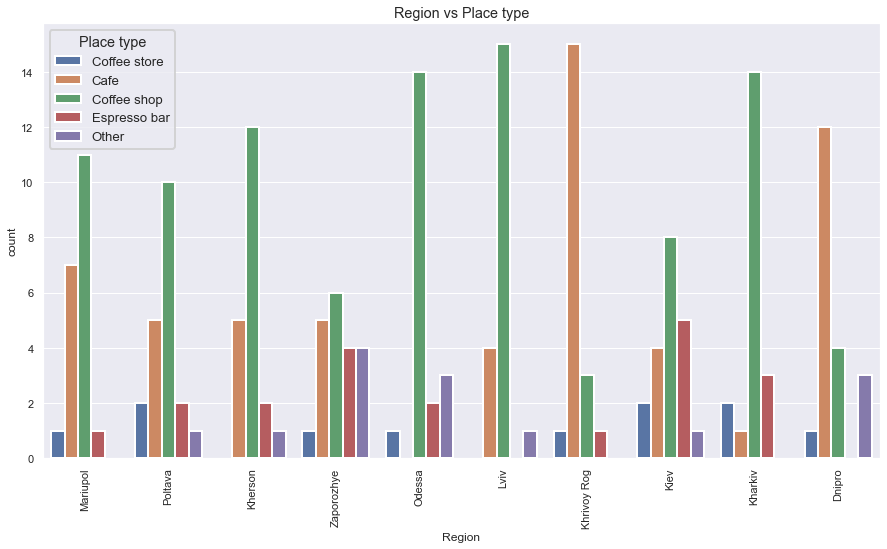

In [15]:
# Region and place type
regional_comparisons(df_clean, 'Place type')

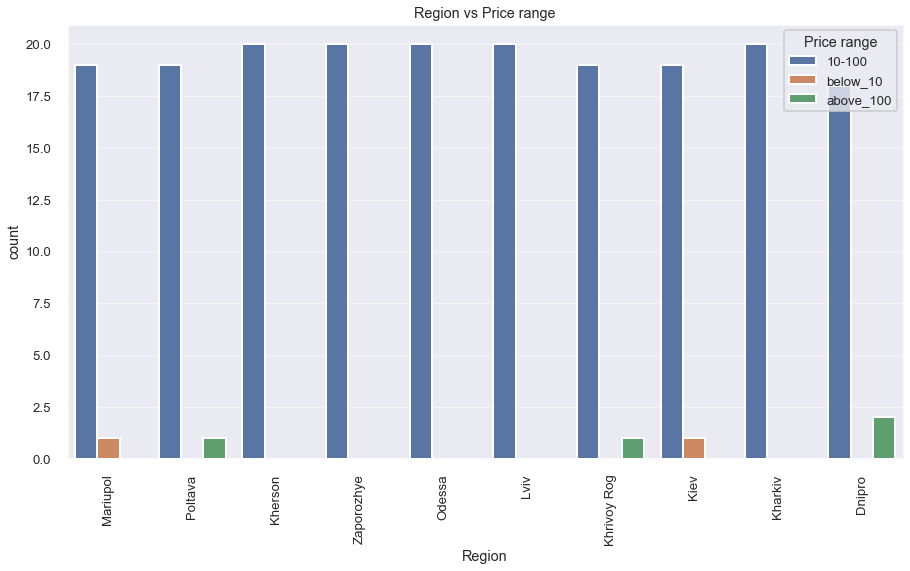

In [16]:
# Region vs Price
regional_comparisons(df_clean, 'Price range')

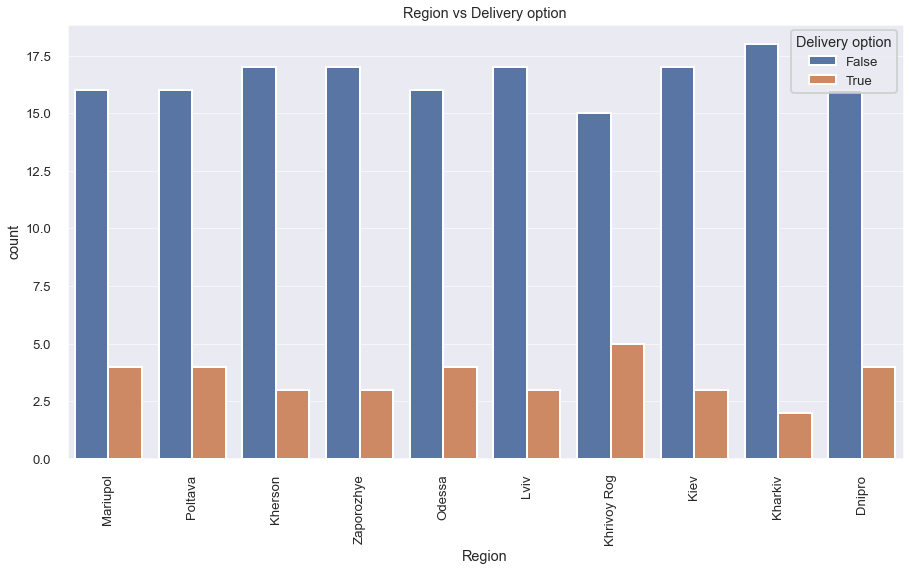

In [17]:
# Region vs Delivery option
regional_comparisons(df_clean, 'Delivery option')

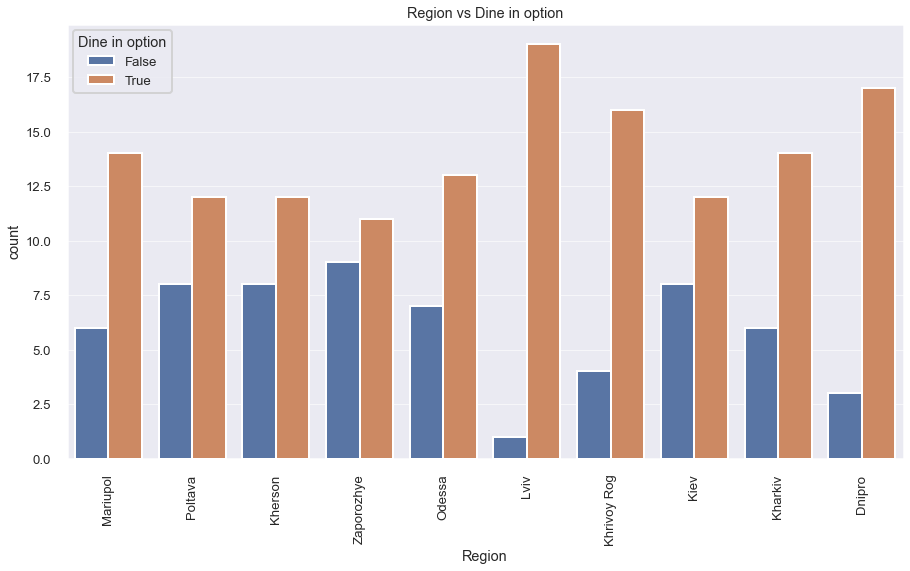

In [18]:
# Region vs Dine in option
regional_comparisons(df_clean, 'Dine in option')

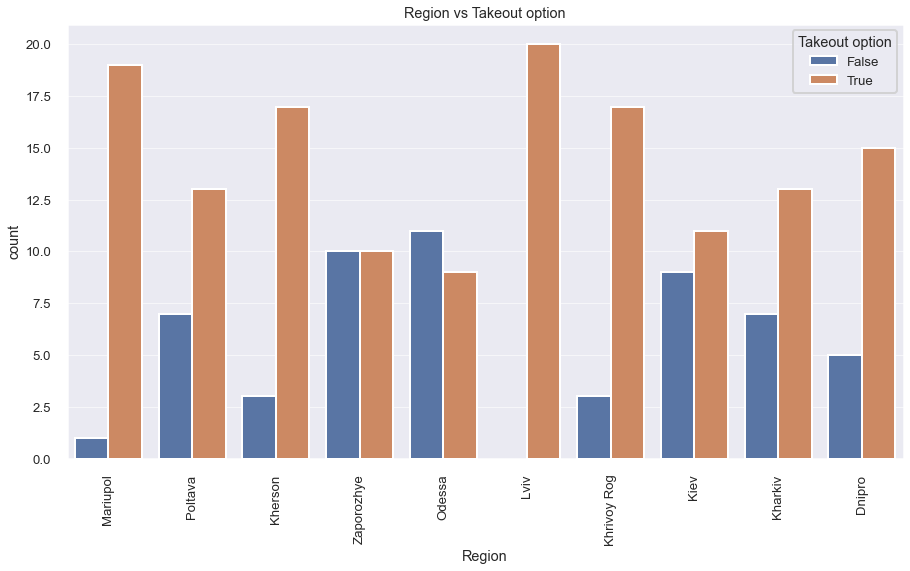

In [19]:
# Region vs Takeout option
regional_comparisons(df_clean, 'Takeout option')

In [64]:
# Relationship between Reviews and Rating and how they vary with other data points
def scatter_plot_categories(data, hue):
    fig, ax = plt.subplots()
    # the size of A4 paper lanscape
    fig.set_size_inches(15, 8)
    sns.set_context("poster", font_scale = .6, rc={"grid.linewidth": 0.6})
    sns.scatterplot(x = 'Reviews', y = 'Rating', hue = hue, data = data)
    plt.setp(ax.get_xticklabels(), rotation=90)
    plt.title('Relationship between Reviews and Rating vs ' + hue)
    plt.savefig(f'images/regionV{hue}.png')
    plt.show()

In [21]:
# boxplot vs categorical variables
def box_plot(**kwargs):
    fig, ax = plt.subplots()
    # the size of A4 paper lanscape
    fig.set_size_inches(8, 15)
    sns.boxplot(**kwargs)
    sns.despine(offset=10, trim=True)
    plt.setp(ax.get_xticklabels(), rotation=90)
    plt.title('{}: Distribution of {} vs {}'.format(kwargs['y'], kwargs['x'], kwargs['hue']))
    plt.savefig('images/age_sex_bxplt.png')
    plt.show()

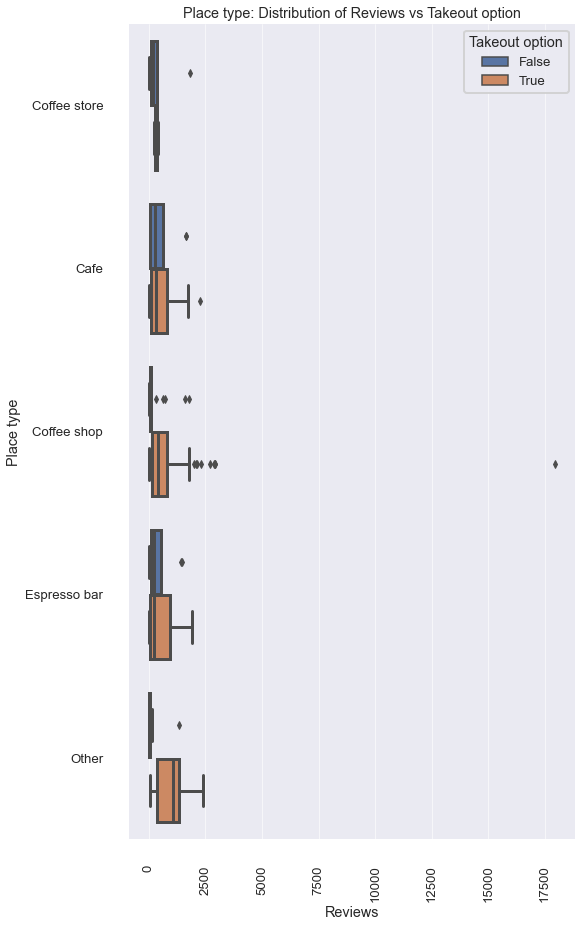

In [22]:
box_plot(y="Place type", x="Reviews",
                hue="Takeout option", data=df_clean)

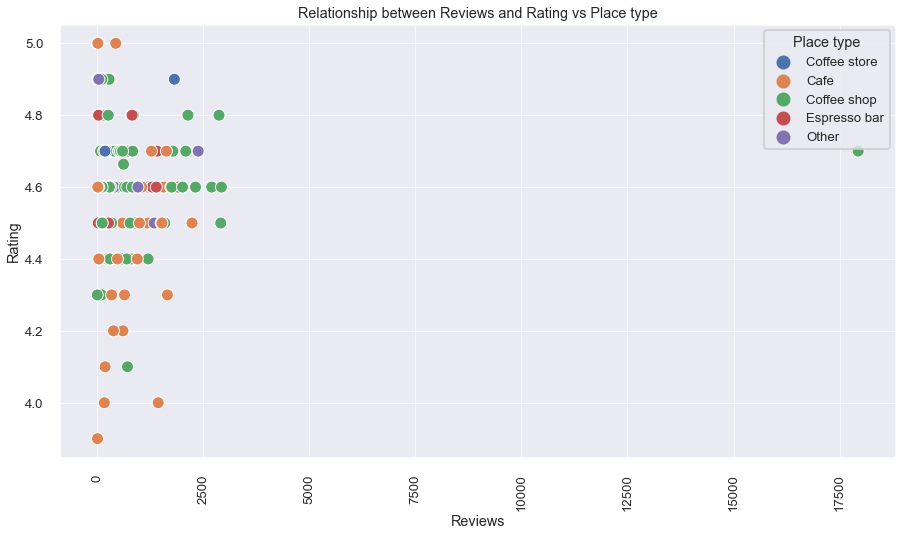

In [23]:
scatter_plot_categories(df_clean, 'Place type')

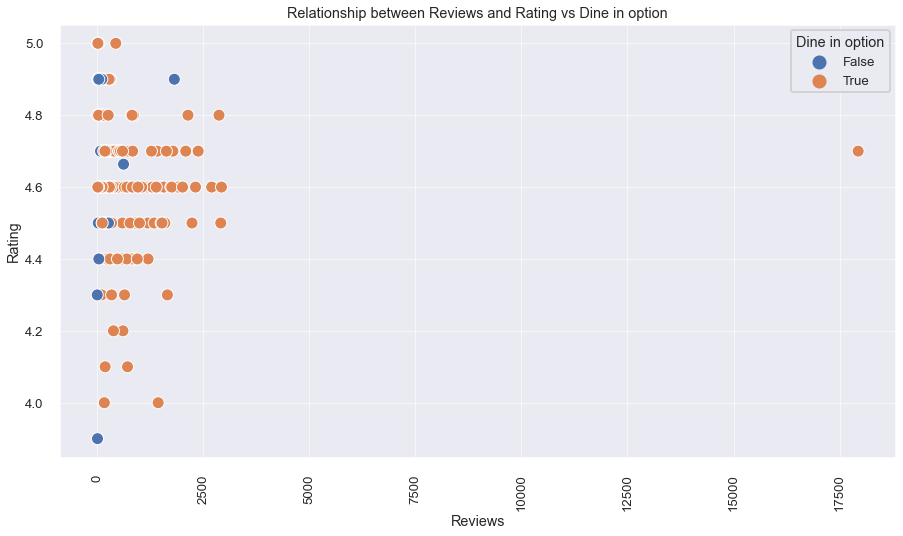

In [24]:
scatter_plot_categories(df_clean, 'Dine in option')

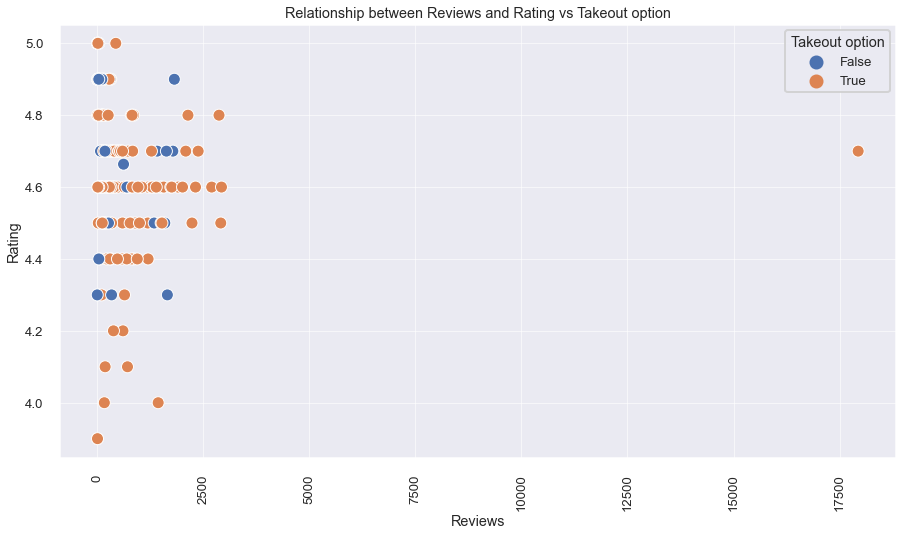

In [25]:
scatter_plot_categories(df_clean, 'Takeout option')

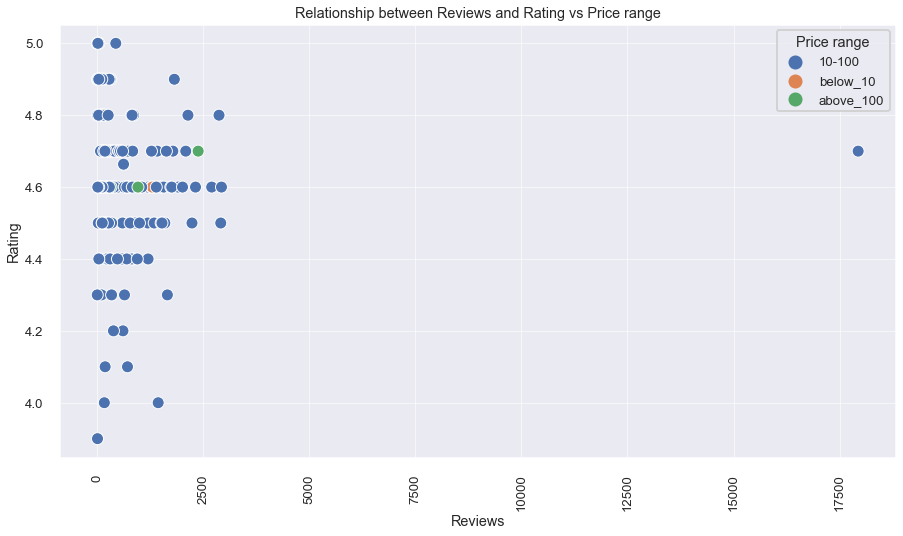

In [26]:
scatter_plot_categories(df_clean, 'Price range')

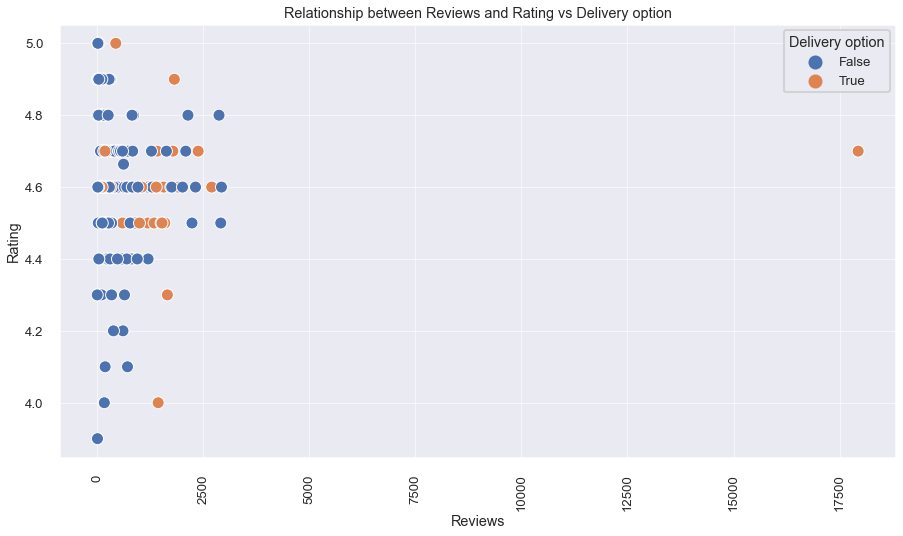

In [27]:
scatter_plot_categories(df_clean, 'Delivery option')

## Clustering of Coffee Shops by Region

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           200 non-null    float64
 4   Reviews          200 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    object 
 7   Dine in option   200 non-null    object 
 8   Takeout option   200 non-null    object 
 9   Price range      200 non-null    object 
dtypes: float64(2), object(8)
memory usage: 27.2+ KB


In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [30]:
ohe = OneHotEncoder()
scaled = StandardScaler()
cat_pipeline = make_pipeline(ohe)
num_pipeline = make_pipeline(scaled)

In [31]:
# function to drop columns and format data into array
def cluster_data_prep(data, *args):
    cat_col = []
    num_col = []
    regions = data['Region']
    unique_regions = data['Region'].unique().tolist()
    data = data.drop([*args], axis = 1)
    data_cols = data.columns
    for col in data_cols:
        if data[col].dtypes == 'object':
            cat_col.append(col)
        elif data[col].dtypes == 'float64' or data[col].dtypes == 'int64' or data[col].dtypes == 'int32':
            num_col.append(col)
    return data, regions, unique_regions, cat_col, num_col

In [32]:
# create column transformer for data preprocessing
def preprocess_col_transformer(cat_col, num_col):
    preprocessor = make_column_transformer(
        (cat_pipeline, cat_col),
        (num_pipeline, num_col),
        remainder = 'passthrough')
    return preprocessor    

In [33]:
# select best k using elbow method
data, regions, unique_regions, cat_col, num_col = cluster_data_prep(df_clean, 'Region', 'Place name', 'Place type', 'Price')
k_range = range(1, len(unique_regions))
inertia = []
preprocessor = preprocess_col_transformer(cat_col, num_col)
for i in k_range:
    km_cluster = KMeans(n_clusters = i, random_state = 42)
    pipe = make_pipeline(preprocessor, km_cluster)
    pipe.fit(data)
    inertia.append(pipe.named_steps['kmeans'].inertia_)

In [34]:
len(df_clean['Region'].unique().tolist())

10

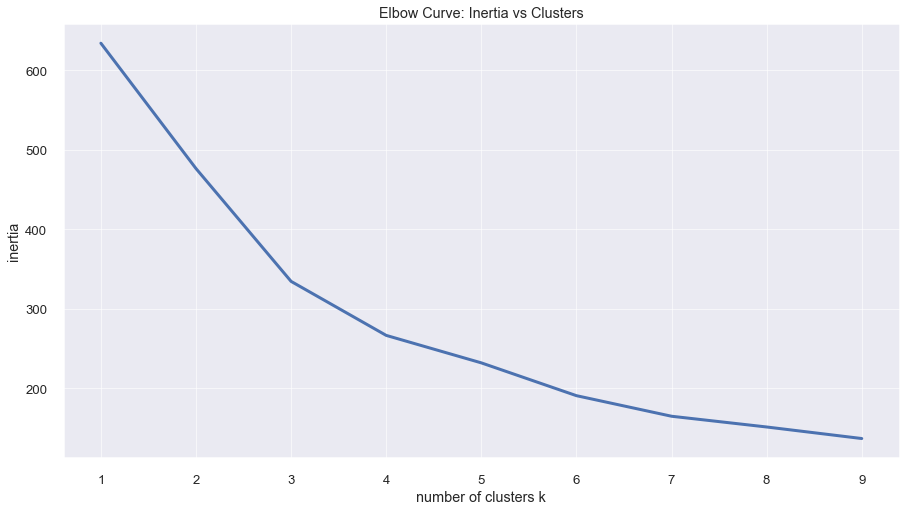

In [35]:
fig, ax = plt.subplots()
 # the size of A4 paper lanscape
fig.set_size_inches(15, 8)
sns.set_context("poster", font_scale = .6, rc={"grid.linewidth": 0.6})
sns.lineplot(x = k_range, y = inertia)
plt.setp(ax.get_xticklabels(), rotation=0)
plt.xlabel('number of clusters k')
plt.ylabel('inertia')
plt.title('Elbow Curve: Inertia vs Clusters')
plt.savefig(f'images/elbow_curve.png')
plt.show()

In [36]:
# check accuracy of clustering against labels using n_clusters = 4 from elbow plot
correct_predictions = 0
km_cluster = KMeans(n_clusters = 4, random_state = 42)
pipe = make_pipeline(preprocessor, km_cluster)
pipe.fit(data)
labels = pipe.predict(data)

In [50]:
labels_v_regions = pd.DataFrame({'labels': labels, 'Regions': regions})
labels_v_regions.tail()

,labels,Regions
195,1,Dnipro
196,2,Dnipro
197,1,Dnipro
198,1,Dnipro
199,2,Dnipro


In [51]:
ct = pd.crosstab(labels_v_regions['labels'], labels_v_regions['Regions'])
ct

Regions,Dnipro,Kharkiv,Kherson,Khrivoy Rog,Kiev,Lviv,Mariupol,Odessa,Poltava,Zaporozhye
labels,,,,,,,,,,
0,3,4,7,3,8,1,5,10,8,9
1,12,14,8,11,12,16,12,10,8,8
2,5,2,5,6,0,2,3,0,4,3
3,0,0,0,0,0,1,0,0,0,0


In [55]:
# merge cluster labels and main dataframe
merged = pd.concat([df_clean, labels_v_regions], axis = 1)
merged_df = merged.drop('Regions', axis = 1)
merged_df.head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option,Price range,labels
0,Mariupol,Dim Kavu,Coffee store,4.6,206.0,$$,False,False,False,10-100,0
1,Mariupol,Коферум,Cafe,5.0,24.0,$$,False,False,True,10-100,0
2,Mariupol,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,False,True,10-100,0
3,Mariupol,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True,10-100,2
4,Mariupol,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True,10-100,1


In [72]:
# extract values of different cluster labels
def cluster_df(data, label):
    df_cluster = merged_df.loc[merged_df['labels'] == label]
    df_cluster = df_cluster.reset_index(drop = True)
    return df_cluster

In [73]:
df_cluster1 = cluster_df(merged_df, 1)
df_cluster1.head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option,Price range,labels
0,Mariupol,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True,10-100,1
1,Mariupol,Racers Coffee Shop,Espresso bar,4.6,367.0,$$,False,True,True,10-100,1
2,Mariupol,Займемся Кофе,Coffee shop,4.6,200.0,$$,False,True,True,10-100,1
3,Mariupol,Кав'ярня My coffee,Coffee shop,4.8,31.0,$$,False,True,True,10-100,1
4,Mariupol,LENЬ. Coffee & desserts.,Coffee shop,4.8,125.0,$$,True,True,True,10-100,1


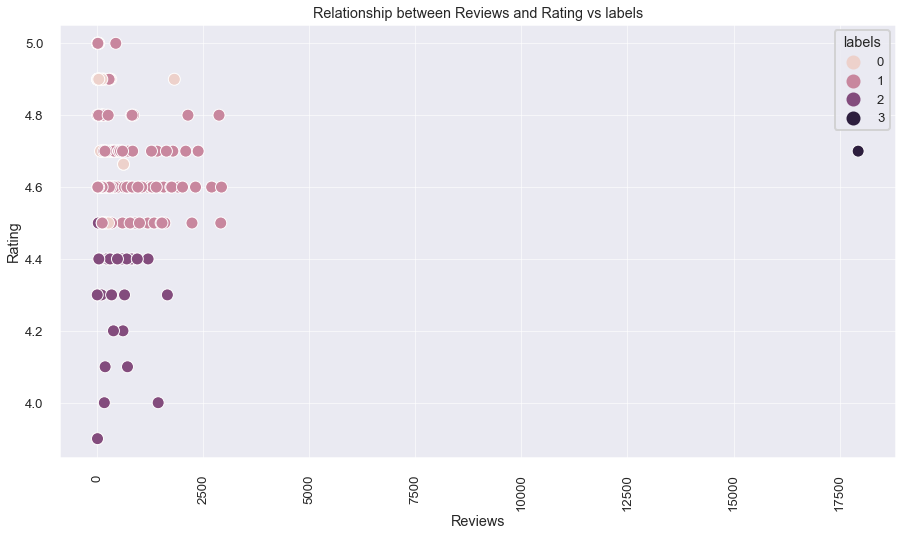

In [74]:
scatter_plot_categories(merged_df, 'labels')

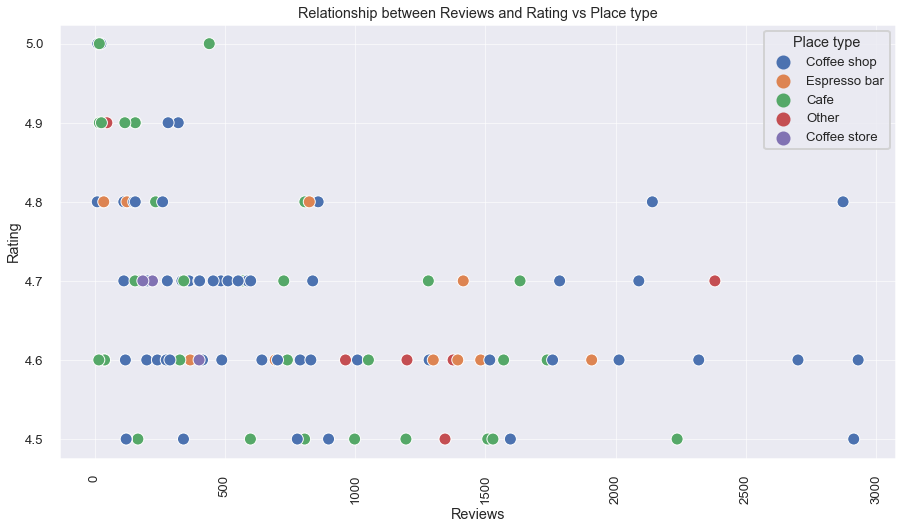

In [76]:
scatter_plot_categories(df_cluster1, 'Place type')

In [68]:
# compare data points by cluster labels
def label_comparisons(data, hue):
    fig, ax = plt.subplots()
    # the size of A4 paper lanscape
    fig.set_size_inches(15, 8)
    sns.set_context("poster", font_scale = .6, rc={"grid.linewidth": 0.6})
    sns.countplot(x = 'labels', hue = hue, data = data)
    plt.setp(ax.get_xticklabels(), rotation=0)
    plt.title('Clusters vs ' + hue)
    plt.savefig(f'images/clustersV{hue}.png')
    plt.show()

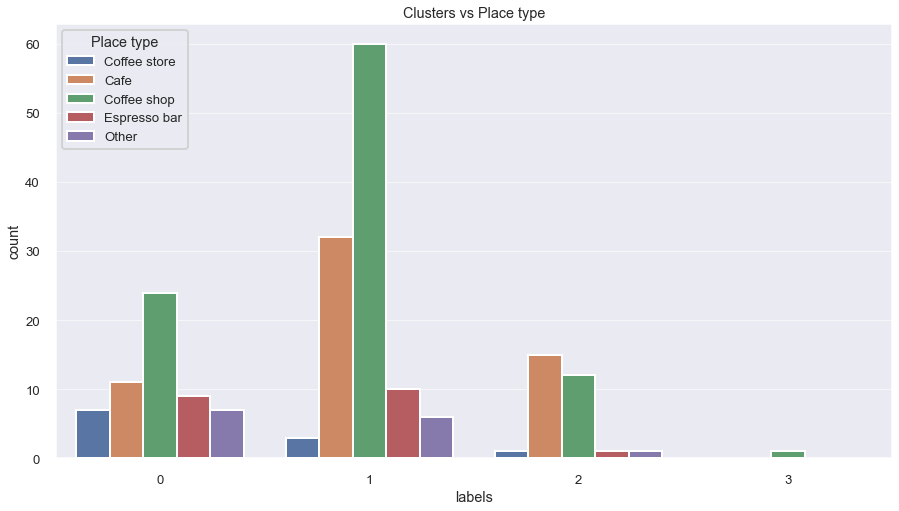

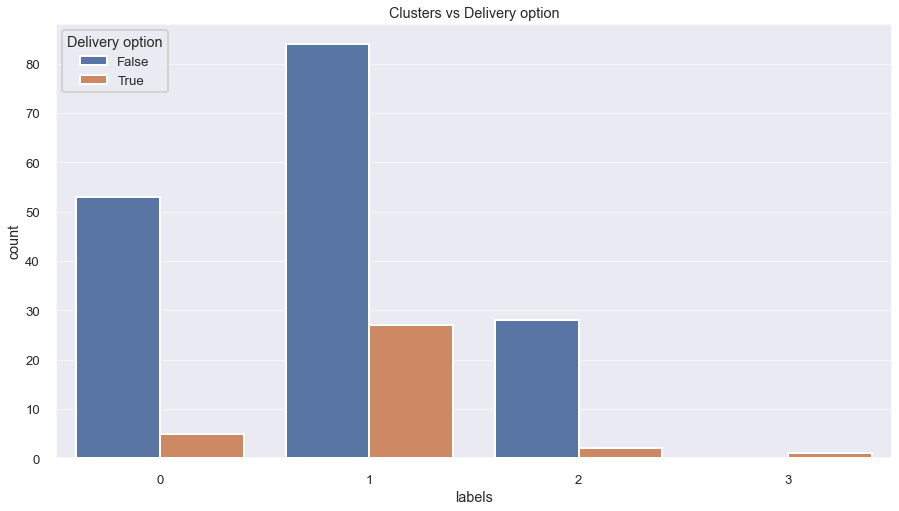

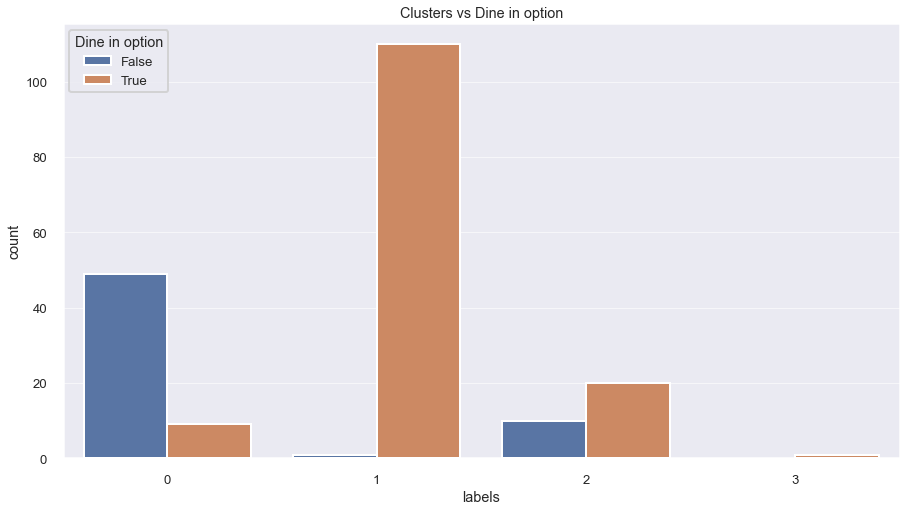

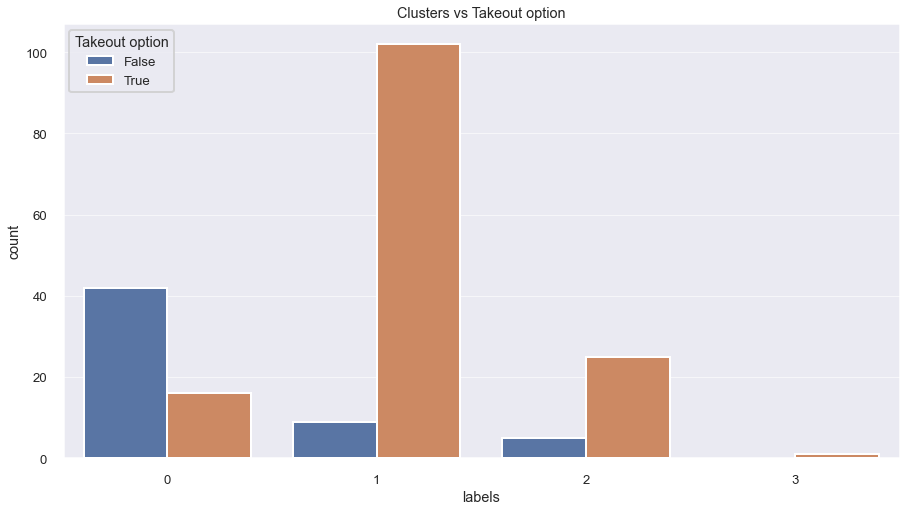

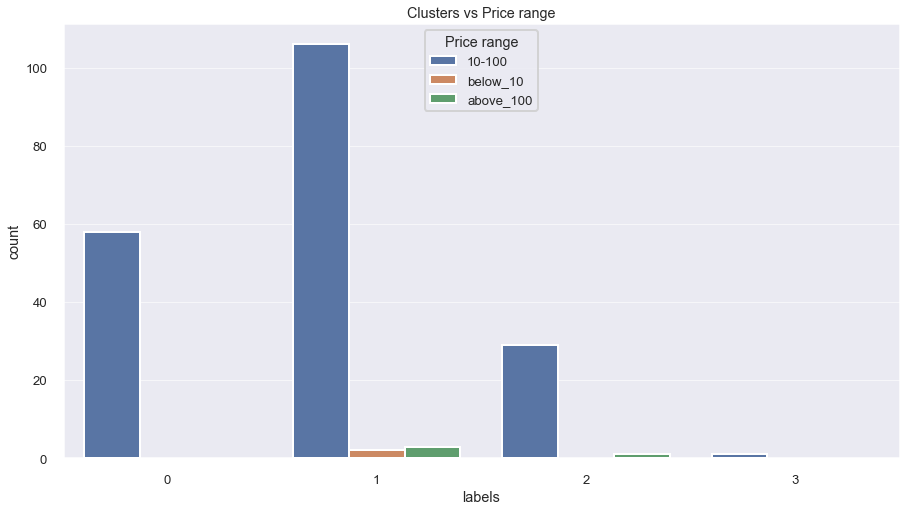

In [71]:
merged_df_cols = ['Place type', 'Delivery option', 'Dine in option', 'Takeout option', 'Price range']
for col in merged_df_cols:
    label_comparisons(merged_df, col)

In [40]:
preprocessor = preprocess_col_transformer(cat_col, num_col)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Delivery option', 'Dine in option',
                                  'Takeout option', 'Price range']),
                                ('pipeline-2',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Rating', 'Reviews'])])

In [41]:
km_cluster = KMeans(n_clusters = 5)
    
pipe = make_pipeline(preprocessor, km_cluster)
pipe.fit(data)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Delivery option',
                                                   'Dine in option',
                                                   'Takeout option',
                                                   'Price range']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Rating', 'Reviews'])])),
                ('kmeans', KMeans(n_clusters=5))])